In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno 
df = pd.read_csv("data.csv", skiprows = 41)
df.head(5)

,FID,file_id,deployment_name,platform_type,platform_code,time_coverage_start,time_coverage_end,TIME,TIME_quality_control,LATITUDE,...,VCUR_GPS_quality_control,IRRAD443,IRRAD443_quality_control,IRRAD490,IRRAD490_quality_control,IRRAD555,IRRAD555_quality_control,IRRAD670,IRRAD670_quality_control,geom
0,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:19Z,1.0,-31.8027,...,9.0,0.2722,4.0,0.3541,4.0,0.0712,4.0,0.0114,4.0,POINT (114.98013440372972 -31.802694506260686)
1,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:22Z,1.0,-31.8027,...,9.0,0.2642,4.0,0.3463,4.0,0.0675,4.0,0.0133,4.0,POINT (114.98013265657173 -31.802693721740056)
2,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:23Z,1.0,-31.8027,...,9.0,0.2579,4.0,0.3398,4.0,0.0675,4.0,0.0128,4.0,POINT (114.98013155928385 -31.802693229028474)
3,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:26Z,1.0,-31.8027,...,9.0,0.2579,4.0,0.3375,4.0,0.0666,4.0,0.0104,4.0,POINT (114.98012962223838 -31.802692359243295)
4,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:28Z,1.0,-31.8027,...,9.0,0.2579,4.0,0.3375,4.0,0.0634,4.0,0.0104,4.0,POINT (114.9801285199303 -31.802691864277513)


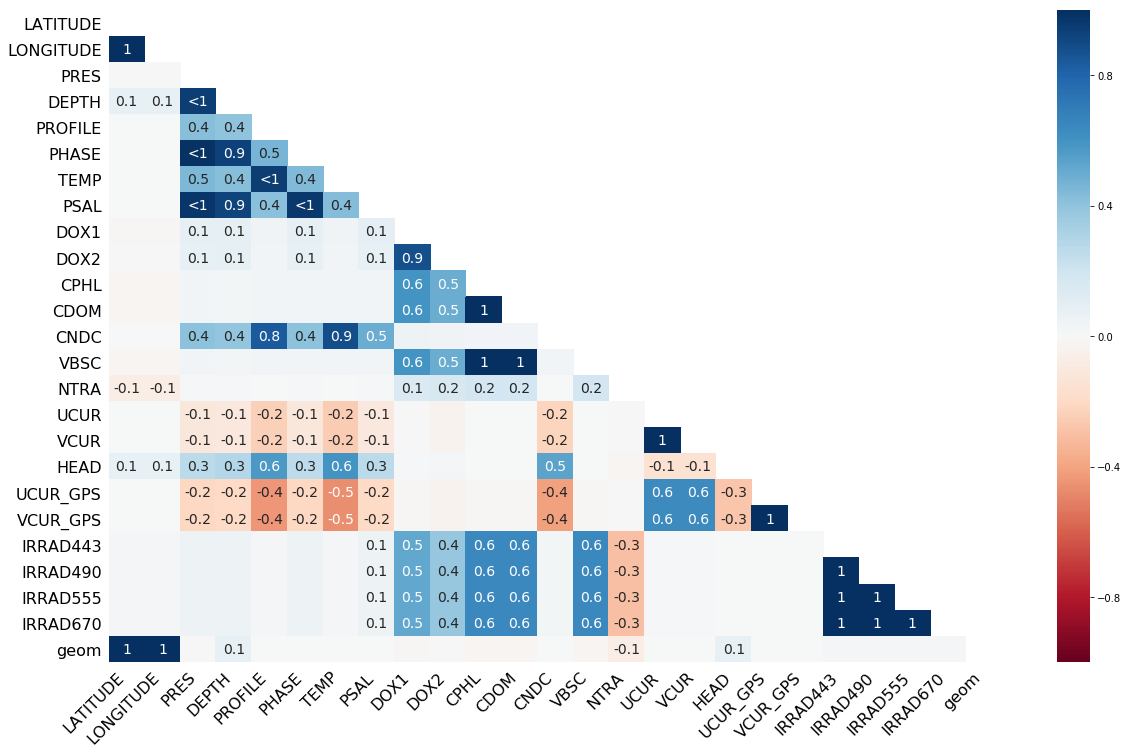

In [2]:
import missingno as msno
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 
#only select the numerical items
#exclude the classification items
df_numerical = df[['LATITUDE', 'LONGITUDE','PRES','DEPTH','PROFILE','PHASE','TEMP','PSAL','DOX1','DOX2','CPHL','CDOM','CNDC','VBSC','NTRA','UCUR','VCUR','HEAD','UCUR_GPS','VCUR_GPS','IRRAD443','IRRAD490','IRRAD555','IRRAD670','geom']]
msno.heatmap(df_numerical) 

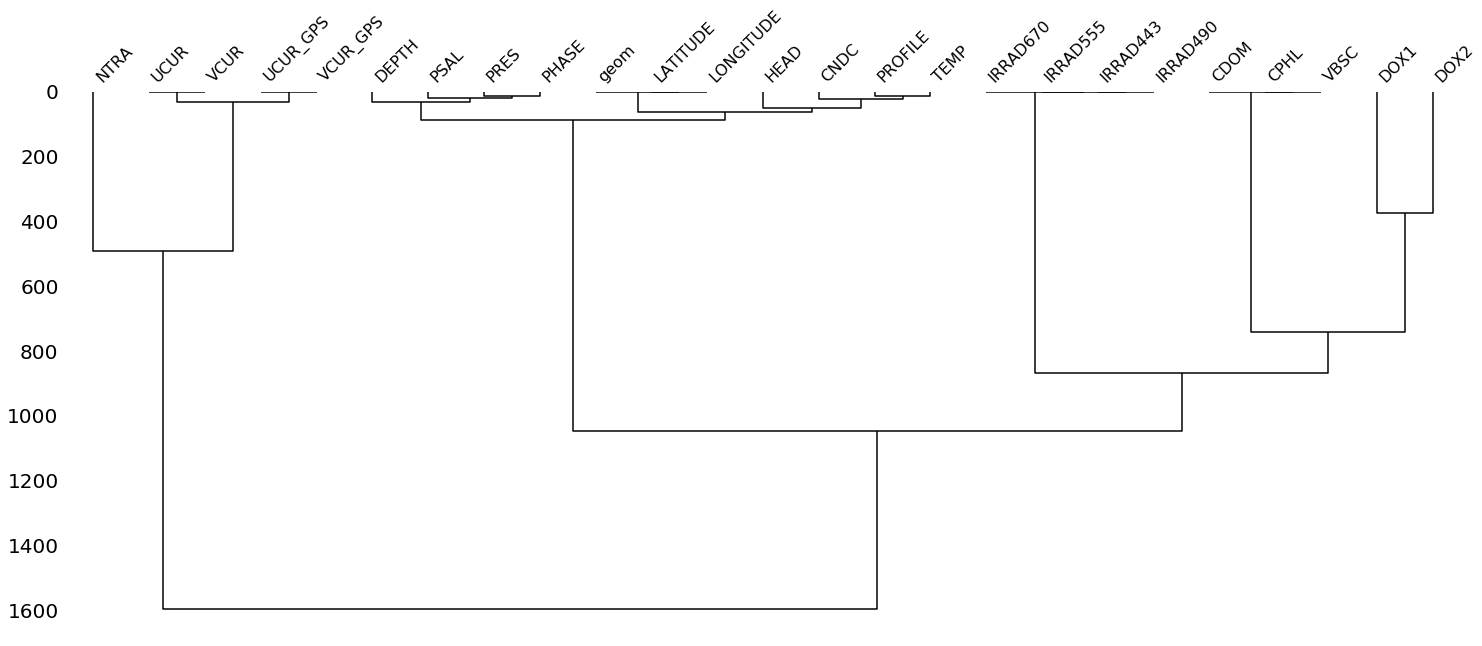

In [3]:
msno.dendrogram(df_numerical)

In [4]:
#table without quality_control
df_wiz= df[['file_id','deployment_name','platform_code','time_coverage_start','time_coverage_end','LATITUDE', 'LONGITUDE','PRES','DEPTH','PROFILE','PHASE','TEMP','PSAL','DOX1','DOX2','CPHL','CDOM','CNDC','VBSC','NTRA','UCUR','VCUR','HEAD','UCUR_GPS','VCUR_GPS','IRRAD443','IRRAD490','IRRAD555','IRRAD670','geom']]
df_wiz.isnull().sum()

file_id                      0
deployment_name              0
platform_code                1
time_coverage_start          1
time_coverage_end            1
LATITUDE                  2110
LONGITUDE                 2110
PRES                      7021
DEPTH                     7843
PROFILE                   1559
PHASE                     7179
TEMP                      1410
PSAL                      7386
DOX1                    641573
DOX2                    782550
CPHL                    877553
CDOM                    877554
CNDC                      1795
VBSC                    877553
NTRA                   2881928
UCUR                   3121895
VCUR                   3121895
HEAD                      3888
UCUR_GPS               3121529
VCUR_GPS               3121529
IRRAD443               1517218
IRRAD490               1517218
IRRAD555               1517218
IRRAD670               1517218
geom                      2110
dtype: int64

In [5]:
#platform_code
a=df_wiz.platform_code.unique()
print(a)
plat_num = df_wiz.platform_code.nunique()
print ("The unique non-null number of platform_code is",plat_num)

['SL248' 'SG152' 'SL416' 'SG155' 'SL287' 'SL281' 'SL286' nan]
The unique non-null number of platform_code is 7


In [6]:
#time diff
st=pd.to_datetime(df.time_coverage_start)
end=pd.to_datetime(df.time_coverage_end)
print(st.unique())
print(end.unique())
print((end-st).dt.days.unique())
start_num = st.nunique()
print ("The unique not-null number of start time is",start_num)

['2013-02-15T03:13:29.000000000' '2013-10-17T03:24:57.000000000'
 '2015-11-26T03:51:30.000000000' '2013-10-24T00:55:30.000000000'
 '2013-10-31T01:16:21.000000000' '2014-08-08T02:48:06.000000000'
 '2014-10-17T00:40:46.000000000'                           'NaT']
['2013-03-11T20:14:20.000000000' '2014-01-06T23:07:23.000000000'
 '2015-12-15T23:12:33.000000000' '2013-12-17T00:40:31.000000000'
 '2013-11-13T05:44:04.000000000' '2014-08-24T22:39:08.000000000'
 '2014-11-06T22:18:12.000000000'                           'NaT']
[24. 81. 19. 53. 13. 16. 20. nan]
The unique not-null number of start time is 7


In [7]:
#df[df.UCUR.notnull()]
#detect the correlation of platform_code and the missing value of UCUR
UR=df_wiz[df_wiz.UCUR.isnull()].groupby('platform_code')
print(UR.platform_code.unique())
ur_pper=UR.platform_code.unique().count()/plat_num*100
print("the percentage of missing value of UCUR that among the different types of platform_code",ur_pper)

platform_code
SG152    [SG152]
SG155    [SG155]
SL248    [SL248]
SL281    [SL281]
SL286    [SL286]
SL287    [SL287]
SL416    [SL416]
Name: platform_code, dtype: object
the percentage of missing value of UCUR that among the different types of platform_code 100.0


In [9]:
#detect the correlation of time and the missing value of UCUR
time_ur=df_wiz[df_wiz.UCUR.isnull()].groupby('time_coverage_start')
time_ur.platform_code.unique()
print("the percentage of missing value of UCUR that among the different slots of time",time_ur.platform_code.unique().count()/start_num*100)

the percentage of missing value of UCUR that among the different slots of time 100.0


In [10]:
#detect the correlation of platform_code and the missing value of NTRA
NA=df_wiz[df_wiz.NTRA.isnull()].groupby('platform_code')
print(NA.platform_code.unique())
print("the percentage of missing value of NTRA that among the different types of platform_code",round(NA.platform_code.unique().count()/plat_num*100))

platform_code
SG152    [SG152]
SG155    [SG155]
SL248    [SL248]
SL281    [SL281]
SL286    [SL286]
SL287    [SL287]
Name: platform_code, dtype: object
the percentage of missing value of NTRA that among the different types of platform_code 86.0


In [11]:
#detect the correlation of time and the missing value of NTRA
time_na=df_wiz[df_wiz.NTRA.isnull()].groupby('time_coverage_start')
print(time_na.platform_code.unique())
print("the percentage of missing value of NTRA that among the different slots of time",round(time_na.platform_code.unique().count()/start_num*100))

time_coverage_start
2013-02-15T03:13:29Z    [SL248]
2013-10-17T03:24:57Z    [SG152]
2013-10-24T00:55:30Z    [SG155]
2013-10-31T01:16:21Z    [SL287]
2014-08-08T02:48:06Z    [SL281]
2014-10-17T00:40:46Z    [SL286]
Name: platform_code, dtype: object
the percentage of missing value of NTRA that among the different slots of time 86.0


In [12]:
#detect the correlation of platform_code and the missing value of VCUR
VR=df_wiz[df_wiz.VCUR.isnull()].groupby('platform_code')
print(VR.platform_code.unique())
print("the percentage of missing value of VCUR that among the different types of platform_code",round(VR.platform_code.unique().count()/plat_num*100))

platform_code
SG152    [SG152]
SG155    [SG155]
SL248    [SL248]
SL281    [SL281]
SL286    [SL286]
SL287    [SL287]
SL416    [SL416]
Name: platform_code, dtype: object
the percentage of missing value of VCUR that among the different types of platform_code 100.0


In [13]:
#detect the correlation of time and the missing value of VCUR
time_vr=df_wiz[df_wiz.VCUR.isnull()].groupby('time_coverage_start')
print(time_vr.platform_code.unique())
print("the percentage of missing value of VCUR that among the different slots of time",round(time_vr.platform_code.unique().count()/start_num*100))

time_coverage_start
2013-02-15T03:13:29Z    [SL248]
2013-10-17T03:24:57Z    [SG152]
2013-10-24T00:55:30Z    [SG155]
2013-10-31T01:16:21Z    [SL287]
2014-08-08T02:48:06Z    [SL281]
2014-10-17T00:40:46Z    [SL286]
2015-11-26T03:51:30Z    [SL416]
Name: platform_code, dtype: object
the percentage of missing value of VCUR that among the different slots of time 100.0
